In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df['Result'].unique()

array([-1,  1], dtype=int64)

In [5]:
df.shape

(11055, 32)

C:\Users\nidhi\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

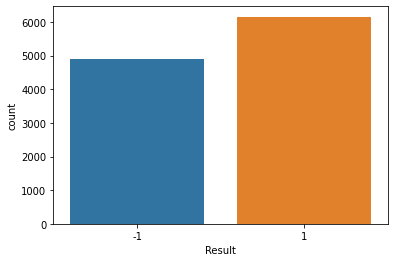

In [3]:
import seaborn as sns
sns.countplot(df['Result'])

In [4]:
#Unique values for each columns
col=df.columns
for i in col:
     if  i!='index':
        print(i,df[i].unique())

having_IPhaving_IP_Address [-1  1]
URLURL_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
having_At_Symbol [ 1 -1]
double_slash_redirecting [-1  1]
Prefix_Suffix [-1  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
Domain_registeration_length [-1  1]
Favicon [ 1 -1]
port [ 1 -1]
HTTPS_token [-1  1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_email [-1  1]
Abnormal_URL [-1  1]
Redirect [0 1]
on_mouseover [ 1 -1]
RightClick [ 1 -1]
popUpWidnow [ 1 -1]
Iframe [ 1 -1]
age_of_domain [-1  1]
DNSRecord [-1  1]
web_traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [-1  1]
Result [-1  1]


In [6]:
#Replacing -1 with 0 
df['Result']=df['Result'].replace(-1,0)

In [27]:
corr = df.corr()['Result'].sort_values()
corr.head()

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Name: Result, dtype: float64

In [28]:
corr.tail()

web_traffic       0.346103
Prefix_Suffix     0.348606
URL_of_Anchor     0.692935
SSLfinal_State    0.714741
Result            1.000000
Name: Result, dtype: float64

<AxesSubplot:>

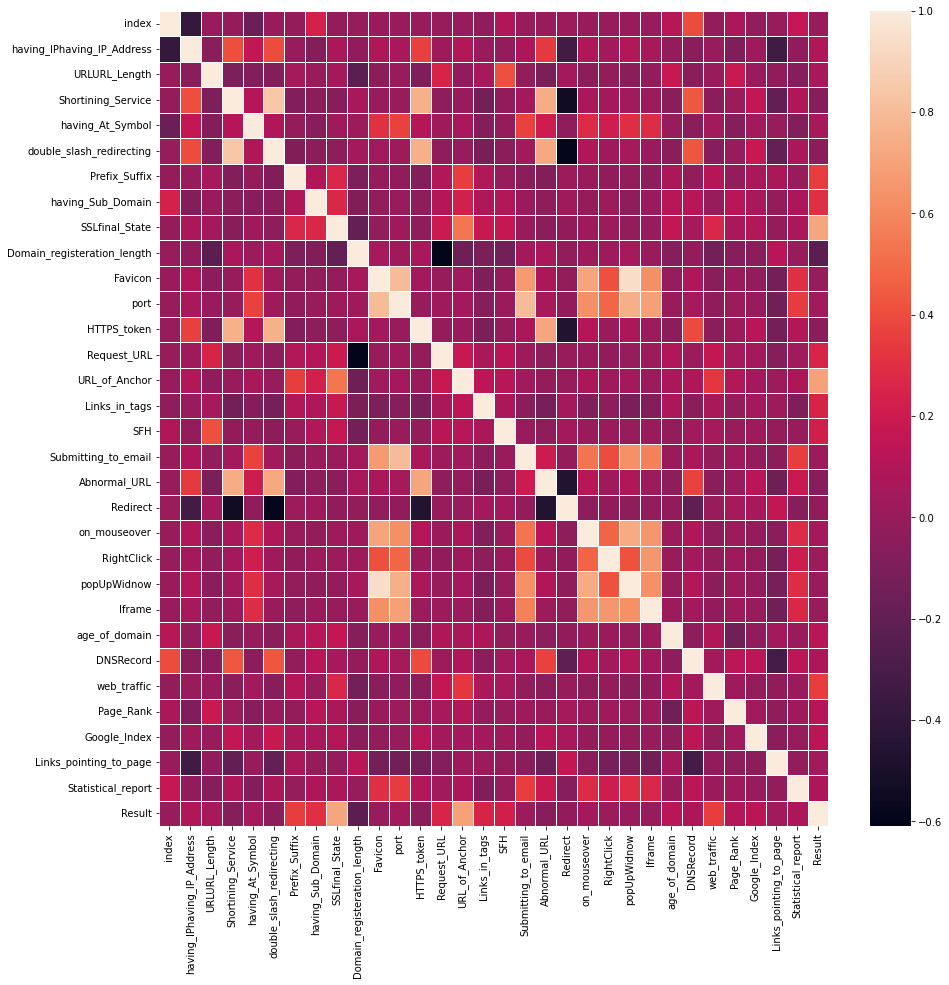

In [32]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)

In [33]:
from sklearn.model_selection import train_test_split,cross_val_score
X= df.drop(columns=['Result','index'])
Y=df['Result']
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.25,random_state=42)

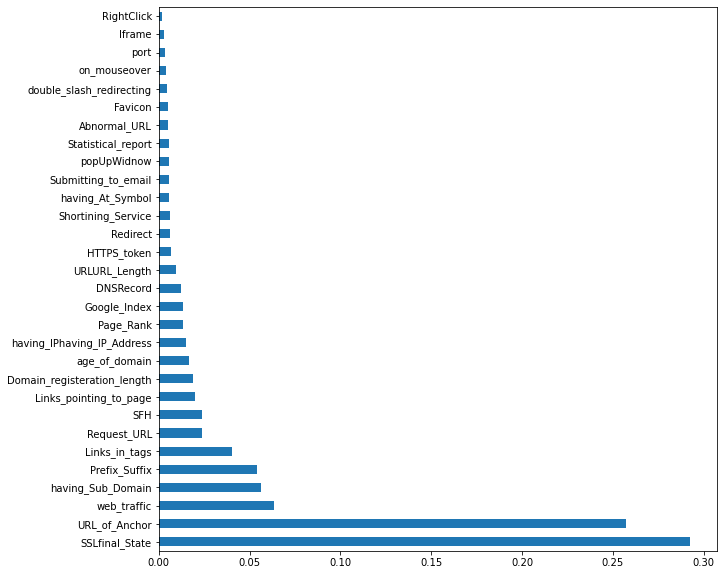

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

we can see that right click is the least determining factor for a website and SSLfinal_State is most determining factor

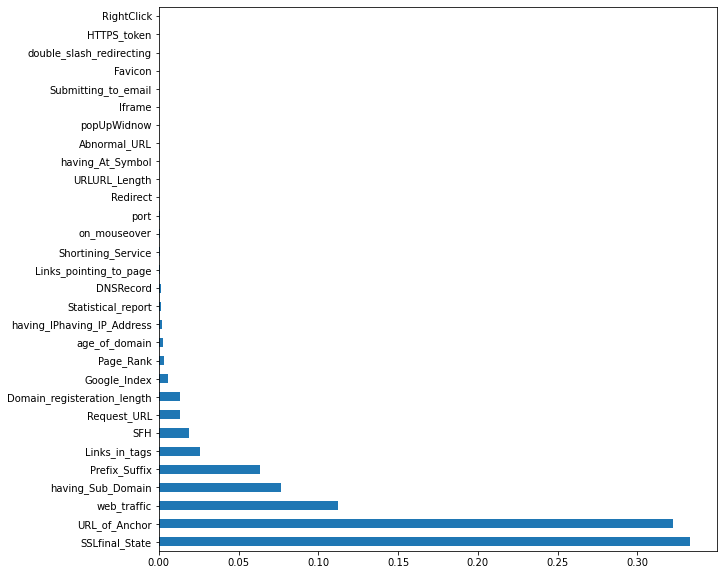

In [40]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier(n_estimators=100, max_depth=3,random_state=0)
model.fit(X,Y)
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,10))
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [41]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(train_X,train_Y)
pred=lr.predict(test_X)
acc_logistic = accuracy_score(pred,test_Y)

In [42]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X,train_Y)
knn_predict=knn.predict(test_X)
acc_knn = accuracy_score(knn_predict,test_Y)

In [44]:
#  find best k value for KNN
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 22)}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(train_X, train_Y)
print("best k:",grid.best_params_)


best k: {'n_neighbors': 1}


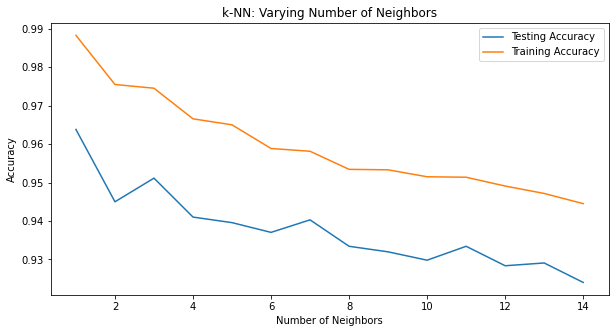

In [15]:
neighbors = np.arange(1, 15)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors= k )

    # Fit the classifier to the training data
    knn.fit(train_X, train_Y)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_X, train_Y)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(test_X, test_Y)

# Generate plot
plt.figure(figsize=(10,5))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [45]:
# KNN using n=1
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X,train_Y)
knn_predict=knn.predict(test_X)
acc_knn = accuracy_score(knn_predict,test_Y)

In [46]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(train_X, train_Y)
naive_predict=clf.predict(test_X)
acc_nb= accuracy_score(naive_predict,test_Y)

In [52]:
# hyper parameter tuning for random forest
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100,200,300,400,500], 'max_depth': [3,4,5,7]}
rf = RandomForestClassifier()
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid.fit(train_X, train_Y)
print(grid.best_params_)

{'max_depth': 7, 'n_estimators': 400}


In [53]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=400, max_depth=7, random_state=42)
forest_clf.fit(train_X,train_Y)
ran_pred=forest_clf.predict(test_X)
acc_rfc=accuracy_score(ran_pred,test_Y)

In [23]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(32,activation='relu',input_dim=30))
ann.add(tf.keras.layers.Dense(16,activation='relu'))
ann.add(tf.keras.layers.Dense(18,activation='relu'))
ann.add(tf.keras.layers.Dense(1,activation='sigmoid'))
ann.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
ann.fit(train_X,train_Y,epochs=100,batch_size=10)

Epoch 1/100
830/830 [==============================] - 6s 4ms/step - loss: 0.2628 - accuracy: 0.8910
Epoch 2/100
830/830 [==============================] - 4s 4ms/step - loss: 0.1720 - accuracy: 0.9287
Epoch 3/100
830/830 [==============================] - 3s 4ms/step - loss: 0.1567 - accuracy: 0.9337
Epoch 4/100
830/830 [==============================] - 3s 4ms/step - loss: 0.1441 - accuracy: 0.9384
Epoch 5/100
830/830 [==============================] - 4s 5ms/step - loss: 0.1325 - accuracy: 0.9431
Epoch 6/100
830/830 [==============================] - 4s 4ms/step - loss: 0.1236 - accuracy: 0.9442
Epoch 7/100
830/830 [==============================] - 3s 4ms/step - loss: 0.1143 - accuracy: 0.9502
Epoch 8/100
830/830 [==============================] - 4s 4ms/step - loss: 0.1103 - accuracy: 0.9499
Epoch 9/100
830/830 [==============================] - 3s 4ms/step - loss: 0.1048 - accuracy: 0.9516
Epoch 10/100
830/830 [==============================] - 3s 4ms/step - loss: 0.0999 - accura

In [19]:
joblib.dump(forest_clf,'model/forest.pkl')

['model/forest.pkl']

In [20]:
loaded_model = joblib.load('model/forest.pkl')
result = loaded_model.score(test_X, test_Y)
print(result)

0.9739507959479016


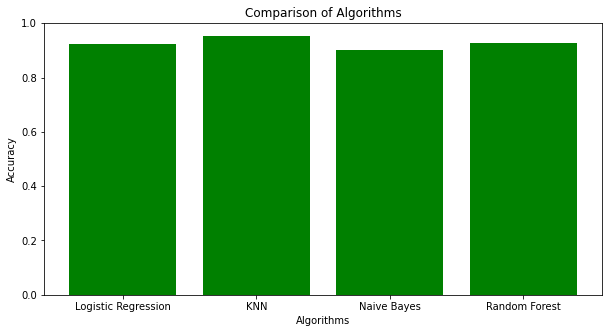

In [50]:
data = {'Logistic Regression':acc_logistic, 'KNN':acc_knn, 'Naive Bayes':acc_nb, 'Random Forest':acc_rfc}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))

# plotting to compare the results
plt.bar(courses, values, color = 'green')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithms')
plt.show()

In [21]:
arr22=np.array([1, 1, 1, 1, 1, 1, 0, 1, -1, 1, 1, 1, 1, 1, 1, 0, 1, -1, -1, -1, -1, -1, 1, 1, -1, 0, 1, 1, 1, 1])

In [54]:
print(acc_logistic)
print(acc_knn)
print(acc_nb)
print(acc_rfc)

0.9222141823444283
0.953328509406657
0.8997829232995659
0.9406657018813314


In [ ]:
arrrrr=[]

In [ ]:
arr33=loaded_model.predict(arr22.reshape(1,-1))